In [54]:
import pandas as pd

# CRM DATASET
crm_sales = pd.read_csv(r'..\won_analysis\all_spain_leads.csv')

# MKT DATASET
mkt_sales =pd.read_csv(r'..\won_analysis\won_date.csv')

# ADM DATASET
adm_sales =pd.read_csv(r'..\won_analysis\cohorts.csv')

C:\Users\ThinkPad-PC\AppData\Local\Temp\ipykernel_2576\1021263435.py:4: DtypeWarning: Columns (17,28) have mixed types. Specify dtype option on import or set low_memory=False.
  crm_sales = pd.read_csv(r'..\won_analysis\all_spain_leads.csv')


In [55]:
mkt_sales = mkt_sales.drop_duplicates()
crm_sales = crm_sales.drop_duplicates()

In [56]:
merged_df = pd.merge(mkt_sales, crm_sales, on='email')

In [57]:
mask = ['email','Course','created_at','won_date']
result = merged_df[mask]

In [58]:
result = result.sort_values('created_at').drop_duplicates('email',keep='first')

In [59]:
import pandas as pd

# Convertir columnas a tipos datetime apropiados sin zona horaria (tz-naive)
result['created_at'] = pd.to_datetime(result['created_at']).dt.tz_localize(None)
result['won_date'] = pd.to_datetime(result['won_date'], errors='coerce').dt.tz_localize(None)

# Asegurarse de que won_date esté en el formato YYYY-MM-DD
result['won_date'] = result['won_date'].dt.strftime('%Y-%m-%d')
result['won_date'] = pd.to_datetime(result['won_date'])

# Calcular la diferencia en días
result['days_difference'] = (result['won_date'] - result['created_at']).dt.days

# Ordenar el resultado
result = result.sort_values(by='days_difference', ascending=True)

result


C:\Users\ThinkPad-PC\AppData\Local\Temp\ipykernel_2576\3926651434.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  result['won_date'] = pd.to_datetime(result['won_date'], errors='coerce').dt.tz_localize(None)


,email,Course,created_at,won_date,days_difference
281,tatianacazorlacabezas@gmail.com,datascience-ml,2023-11-28 16:15:23.967267,2023-01-12,-321
222,dperfe@gmail.com,full-stack,2023-10-27 04:54:47.199272,2023-01-11,-290
282,andre.cortes11@gmail.com,full-stack,2023-11-11 14:07:05.644201,2023-02-12,-273
223,ernesto_epd@yahoo.com,full-stack,2023-10-30 11:16:50.380975,2023-02-11,-262
283,pedro.abel94@gmail.com,full-stack,2023-11-28 17:07:09.798736,2023-04-12,-231
...,...,...,...,...,...
1084,winston04carrillo@gmail.com,full-stack,2022-02-22 12:07:19.087845,2024-10-09,959
708,jason-ollivierre@hotmail.com,full-stack,2021-04-11 11:39:02.932194,2024-04-06,1090
324,vickygonrod@gmail.com,full-stack,2021-01-24 07:46:35.721728,2024-02-01,1102
346,nelson.lombo@gmail.com,datascience-ml,2021-06-29 22:03:11.912184,2024-12-01,1250


In [60]:
result.to_csv(r'C:\Users\ThinkPad-PC\Documents\GitHub\won_analysis\merged_result.csv',index=False)

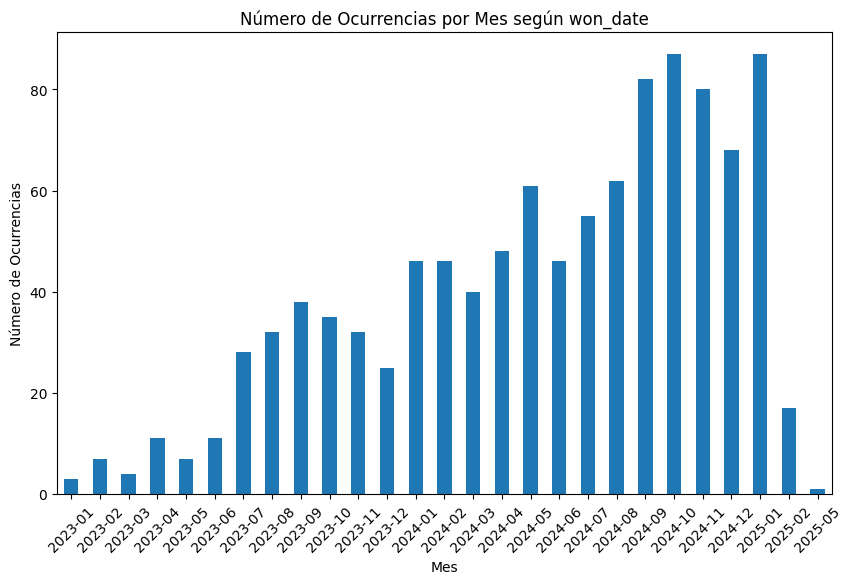

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ejemplo
# Convertir la columna won_date a tipo datetime
result['won_date'] = pd.to_datetime(result['won_date'], errors='coerce')

# Agrupar por mes y contar el número de ocurrencias
monthly_counts = result['won_date'].dt.to_period('M').value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.xlabel('Mes')
plt.ylabel('Número de Ocurrencias')
plt.title('Número de Ocurrencias por Mes según won_date')
plt.xticks(rotation=45)
plt.show()
